# **Import Libraries**

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


# **Load Dataset & Check Info.**

In [2]:
df_dataset = pd.read_csv('./Datasource/Quiz2 Class Train.csv')
df_dataset_original = df_dataset.copy()

df_dataset


,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,id-001,4.98,0.55,e,n,y,8.29,1.29,-8.60,-20.77,-15.64,NaN
1,id-002,3.71,6.33,g,n,v,9.84,-1.12,-4.00,-18.82,-7.02,D
2,id-003,26.50,NaN,e,o,v,21.63,20.27,13.96,3.36,0.66,D
3,id-004,11.39,6.29,h,o,w,0.70,11.14,7.19,15.62,1.59,A
4,id-005,5.95,4.40,f,l,v,30.71,6.22,30.21,4.33,-4.27,D
...,...,...,...,...,...,...,...,...,...,...,...,...
485,id-486,20.57,1.46,g,p,x,-21.54,21.11,-52.55,-24.60,4.89,B
486,id-487,17.58,-3.73,e,l,w,-3.04,-21.11,38.80,29.34,-1.71,A
487,id-488,9.29,4.58,e,n,u,-9.01,-14.15,9.94,8.72,-2.94,C
488,id-489,7.59,9.15,f,p,w,4.35,16.51,-9.61,-4.13,-12.14,D


In [3]:
df_dataset.info()
df_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      480 non-null    object 
 1   x1      480 non-null    float64
 2   x2      480 non-null    float64
 3   x3      480 non-null    object 
 4   x4      480 non-null    object 
 5   x5      480 non-null    object 
 6   x6      480 non-null    float64
 7   x7      480 non-null    float64
 8   x8      480 non-null    float64
 9   x9      480 non-null    float64
 10  x10     480 non-null    float64
 11  y       480 non-null    object 
dtypes: float64(7), object(5)
memory usage: 46.1+ KB


,x1,x2,x6,x7,x8,x9,x10
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,4.713625,0.514500,2.182604,-2.336500,4.362917,-0.268292,-0.413354
std,14.164752,10.165593,14.188185,14.624282,22.636286,15.119244,10.002220
min,-35.950000,-31.270000,-35.730000,-50.360000,-62.160000,-39.570000,-38.230000
25%,-4.510000,-5.995000,-7.807500,-12.770000,-9.877500,-11.985000,-6.920000
50%,5.635000,0.805000,2.010000,-2.940000,2.960000,-2.175000,-0.215000
75%,14.640000,7.480000,11.530000,8.245000,16.317500,10.822500,6.265000
max,41.440000,34.840000,43.050000,32.540000,114.210000,48.840000,28.350000


# **Data Cleansing & Re-Check Info.**

In [4]:
df_dataset.drop(['id'], axis=1, inplace=True)
df_dataset.dropna(inplace=True)

df_dataset


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
1,3.71,6.33,g,n,v,9.84,-1.12,-4.00,-18.82,-7.02,D
3,11.39,6.29,h,o,w,0.70,11.14,7.19,15.62,1.59,A
4,5.95,4.40,f,l,v,30.71,6.22,30.21,4.33,-4.27,D
5,14.07,-7.99,g,o,u,-21.16,-9.17,-10.81,1.19,8.97,C
7,-9.31,34.84,f,l,y,-7.83,-34.83,0.54,-18.94,13.83,D
...,...,...,...,...,...,...,...,...,...,...,...
485,20.57,1.46,g,p,x,-21.54,21.11,-52.55,-24.60,4.89,B
486,17.58,-3.73,e,l,w,-3.04,-21.11,38.80,29.34,-1.71,A
487,9.29,4.58,e,n,u,-9.01,-14.15,9.94,8.72,-2.94,C
488,7.59,9.15,f,p,w,4.35,16.51,-9.61,-4.13,-12.14,D


In [5]:
le = LabelEncoder()

df_dataset["x3_encoded"] = le.fit_transform(df_dataset["x3"])
df_dataset["x4_encoded"] = le.fit_transform(df_dataset["x4"])
df_dataset["x5_encoded"] = le.fit_transform(df_dataset["x5"])
df_dataset.drop(['x3', 'x4', 'x5'], axis=1, inplace=True)

df_dataset


,x1,x2,x6,x7,x8,x9,x10,y,x3_encoded,x4_encoded,x5_encoded
1,3.71,6.33,9.84,-1.12,-4.00,-18.82,-7.02,D,2,2,1
3,11.39,6.29,0.70,11.14,7.19,15.62,1.59,A,3,3,2
4,5.95,4.40,30.71,6.22,30.21,4.33,-4.27,D,1,0,1
5,14.07,-7.99,-21.16,-9.17,-10.81,1.19,8.97,C,2,3,0
7,-9.31,34.84,-7.83,-34.83,0.54,-18.94,13.83,D,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...
485,20.57,1.46,-21.54,21.11,-52.55,-24.60,4.89,B,2,4,3
486,17.58,-3.73,-3.04,-21.11,38.80,29.34,-1.71,A,0,0,2
487,9.29,4.58,-9.01,-14.15,9.94,8.72,-2.94,C,0,2,0
488,7.59,9.15,4.35,16.51,-9.61,-4.13,-12.14,D,1,4,2


In [6]:
df_dataset.reset_index(inplace=True, drop=True)

df_dataset


,x1,x2,x6,x7,x8,x9,x10,y,x3_encoded,x4_encoded,x5_encoded
0,3.71,6.33,9.84,-1.12,-4.00,-18.82,-7.02,D,2,2,1
1,11.39,6.29,0.70,11.14,7.19,15.62,1.59,A,3,3,2
2,5.95,4.40,30.71,6.22,30.21,4.33,-4.27,D,1,0,1
3,14.07,-7.99,-21.16,-9.17,-10.81,1.19,8.97,C,2,3,0
4,-9.31,34.84,-7.83,-34.83,0.54,-18.94,13.83,D,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...
385,20.57,1.46,-21.54,21.11,-52.55,-24.60,4.89,B,2,4,3
386,17.58,-3.73,-3.04,-21.11,38.80,29.34,-1.71,A,0,0,2
387,9.29,4.58,-9.01,-14.15,9.94,8.72,-2.94,C,0,2,0
388,7.59,9.15,4.35,16.51,-9.61,-4.13,-12.14,D,1,4,2


In [7]:
df_dataset.info()
df_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   x1          390 non-null    float64
 1   x2          390 non-null    float64
 2   x6          390 non-null    float64
 3   x7          390 non-null    float64
 4   x8          390 non-null    float64
 5   x9          390 non-null    float64
 6   x10         390 non-null    float64
 7   y           390 non-null    object 
 8   x3_encoded  390 non-null    int64  
 9   x4_encoded  390 non-null    int64  
 10  x5_encoded  390 non-null    int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 33.6+ KB


,x1,x2,x6,x7,x8,x9,x10,x3_encoded,x4_encoded,x5_encoded
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,4.783641,0.811128,2.155000,-2.567103,4.572359,-0.271487,-0.202795,2.015385,1.984615,1.923077
std,14.118118,10.243768,13.985673,14.347085,22.689729,15.149261,9.926340,1.437568,1.430397,1.397475
min,-35.950000,-31.270000,-35.730000,-50.360000,-56.160000,-39.570000,-38.230000,0.000000,0.000000,0.000000
25%,-4.400000,-5.655000,-7.567500,-12.640000,-9.972500,-11.947500,-6.752500,1.000000,1.000000,1.000000
50%,5.920000,0.885000,1.775000,-3.250000,3.100000,-1.855000,-0.275000,2.000000,2.000000,2.000000
75%,14.962500,7.935000,11.457500,7.842500,16.557500,10.552500,6.392500,3.000000,3.000000,3.000000
max,41.440000,34.840000,43.050000,32.540000,114.210000,48.840000,28.350000,4.000000,4.000000,4.000000


# **Data Exploring**

<AxesSubplot: xlabel='y', ylabel='Count'>

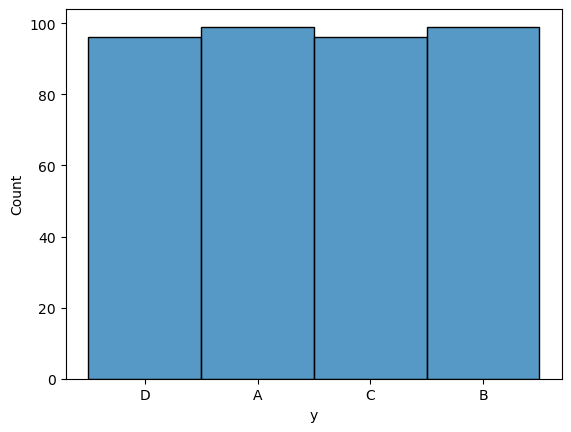

In [8]:
sns.histplot(df_dataset['y'])


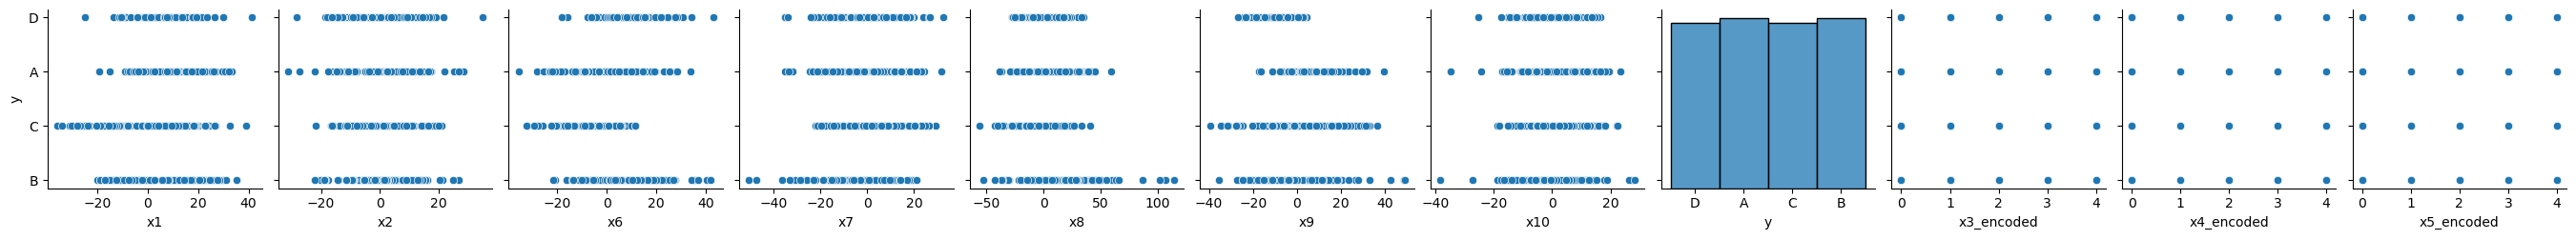

In [9]:
sns.pairplot(df_dataset, x_vars=df_dataset.columns, y_vars=["y"])


# **Create Model**

In [10]:
X = df_dataset[df_dataset.columns].drop('y', axis=1)
y = df_dataset["y"]


### **Create Scaler (for global usage)**

In [11]:
scaler = StandardScaler().fit(X)


### **Scale X**

In [12]:
X = scaler.transform(X)

### **Create necessary variable**

In [13]:
best_model_score = 0
best_model_method = None
best_model_param = None

cv = 5
scoring = "f1_macro"


### **1) Try Neural Network Model**

In [14]:
nn_grid_param = {
    'hidden_layer_sizes': [(200,200,10),(100,50,30)],
    'max_iter': [5000],
    'activation': ['tanh'],
}

grid_search_model = GridSearchCV(
    MLPClassifier(), nn_grid_param, cv=cv, scoring=scoring)
grid_search_model.fit(X, y)

nn_score = grid_search_model.cv_results_['mean_test_score'].mean()
print(f'{scoring} score : {nn_score}')

# save best model information #
if nn_score >= best_model_score:
    best_model_score, best_model_method = nn_score, "NN"
    best_model_param = grid_search_model.best_params_


f1_macro score : 0.7533373218960697


### **2) Try Logistic Regression Model**

In [15]:
lr_grid_param = {
    'max_iter': [5000],
    'solver': ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
}

grid_search_model = GridSearchCV(
    LogisticRegression(), lr_grid_param, cv=cv, scoring=scoring)
grid_search_model.fit(X, y)

lr_score = grid_search_model.cv_results_['mean_test_score'].mean()
print(f'{scoring} score : {lr_score}')

# save best model information #
if lr_score >= best_model_score:
    best_model_score, best_model_method = lr_score, "LR"
    best_model_param = grid_search_model.best_params_


f1_macro score : 0.5946329062365748


### **3) Try Naïve Bayes Model**

In [16]:
lr_grid_param = {
    'var_smoothing': [1e-9],
}

grid_search_model = GridSearchCV(
    GaussianNB(), lr_grid_param, cv=cv, scoring=scoring)
grid_search_model.fit(X, y)

nb_score = grid_search_model.cv_results_['mean_test_score'].mean()
print(f'{scoring} score : {nb_score}')

# save best model information #
if nb_score >= best_model_score:
    best_model_score, best_model_method = nb_score, "NB"
    best_model_param = grid_search_model.best_params_


f1_macro score : 0.6129539485915203


### **4) Try K-Nearest Neighbors Model**

In [17]:
knn_grid_param = {
    'algorithm': ["auto", "ball_tree", "kd_tree", "brute"],
    'n_neighbors': [len(y.unique())],
    'weights':["uniform", "distance"]
}

grid_search_model = GridSearchCV(
    KNeighborsClassifier(), knn_grid_param, cv=cv, scoring=scoring)
grid_search_model.fit(X, y)

knn_score = grid_search_model.cv_results_['mean_test_score'].mean()
print(f'{scoring} score : {knn_score}')

# save best model information #
if knn_score >= best_model_score:
    best_model_score, best_model_method = knn_score, "KNN"
    best_model_param = grid_search_model.best_params_


f1_macro score : 0.6760091081999291


### **Build Model**

In [18]:
print(
    f'choose {best_model_method} model with {scoring} score : {best_model_score}'
)
print(
    f'with best param : {best_model_param}'
)


model = None
if best_model_method == "NN":
    model = MLPClassifier(**best_model_param)
elif best_model_method == "LR":
    model = LogisticRegression(**best_model_param)
elif best_model_method == "NB":
    model = GaussianNB(**best_model_param)
elif best_model_method == "KNN":
    model = KNeighborsClassifier(**best_model_param)

model.fit(X, y)


choose NN model with f1_macro score : 0.7533373218960697
with best param : {'activation': 'tanh', 'hidden_layer_sizes': (100, 50, 30), 'max_iter': 5000}


MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 50, 30),
              max_iter=5000)

# **Predict Unseen Data**

In [19]:
X_unseen = pd.read_csv('./Datasource/Quiz2 Class Unseen.csv')

# unseen data cleansing #
X_unseen.drop(['id'], axis=1, inplace=True)

df_dataset_original_droped_na = df_dataset_original.dropna()

le = LabelEncoder().fit(df_dataset_original_droped_na["x3"])
X_unseen["x3_encoded"] = le.transform(X_unseen['x3'])

le = LabelEncoder().fit(df_dataset_original_droped_na["x4"])
X_unseen["x4_encoded"] = le.transform(X_unseen['x4'])

le = LabelEncoder().fit(df_dataset_original_droped_na["x5"])
X_unseen["x5_encoded"] = le.transform(X_unseen['x5'])

X_unseen.drop(['x3', 'x4', 'x5'], axis=1, inplace=True)

# scale X data #
X_unseen = scaler.transform(X_unseen)

# predict unseen data #
model.predict(X_unseen)


array(['D', 'C', 'C', 'C', 'D', 'C', 'D', 'B', 'D', 'C'], dtype='<U1')